In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Load the interactions summary from Human Promoter Analysis

In [20]:
df = pd.read_csv('TAL-GATA_binaryFeat_Analysis_customTFs_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [21]:
df.shape

(153, 12)

In [22]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter7<-->filter12,1376,M1868_1.02,0.004811,M6500_1.02,0.000308,144.0,156.0,834.0,2744.0,8.269234e-23,8.184074e-21
1,filter7<-->filter18,1382,M1868_1.02,0.004811,M1868_1.02,0.031414,114.0,408.0,950.0,2112.0,7.960970e-46,1.218212e-42
2,filter7<-->filter20,1384,M1868_1.02,0.004811,M1868_1.02,0.000171,420.0,294.0,826.0,1842.0,2.775504e-43,2.905952e-40
3,filter7<-->filter21,1385,M1868_1.02,0.004811,M6500_1.02,0.000050,354.0,444.0,804.0,2431.0,2.968257e-26,4.373892e-24
4,filter7<-->filter24,1388,M1868_1.02,0.004811,M1868_1.02,0.014580,84.0,48.0,1270.0,3584.0,4.789313e-61,4.763690e-57


##### keep significant interactions

In [23]:
df = df[df['adjusted_pval']<0.05]

In [24]:
df.shape

(87, 12)

In [25]:
threshold = 0.05
df = df[(df['motif1_qval'] < threshold) & (df['motif2_qval']<threshold)]

In [26]:
df.shape

(87, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [32]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [33]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [34]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [35]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=False)

In [36]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+'<-->'+x['TF2'], axis=1)

In [37]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
4,filter7<-->filter24,1388,M1868_1.02,0.004811,M1868_1.02,0.014580,84.0,48.0,1270.0,3584.0,4.789313e-61,4.763690e-57,GATA2,GATA2,GATA2<-->GATA2
76,filter24<-->filter41,4516,M1868_1.02,0.014580,M1868_1.02,0.043280,24.0,30.0,1154.0,3225.0,9.163598e-21,7.120760e-19,GATA2,GATA2,GATA2<-->GATA2
80,filter24<-->filter92,4567,M1868_1.02,0.014580,M1868_1.02,0.037502,366.0,138.0,1142.0,2756.0,5.505790e-15,2.047228e-13,GATA2,GATA2,GATA2<-->GATA2
35,filter18<-->filter24,3434,M1868_1.02,0.031414,M1868_1.02,0.014580,276.0,156.0,1100.0,2159.0,2.907059e-44,3.212785e-41,GATA2,GATA2,GATA2<-->GATA2
78,filter24<-->filter61,4536,M1868_1.02,0.014580,M1868_1.02,0.025728,318.0,48.0,1068.0,2924.0,1.481803e-51,4.211073e-48,GATA2,GATA2,GATA2<-->GATA2


In [38]:
df = df[df['TF1']!=df['TF2']]

In [39]:
df.shape

(14, 15)

In [40]:
df.head(20)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
20,filter12<-->filter24,2333,M6500_1.02,0.000308,M1868_1.02,0.014580,492.0,138.0,964.0,2865.0,2.703146e-18,1.535394e-16,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"
62,filter21<-->filter24,3971,M6500_1.02,0.000050,M1868_1.02,0.014580,48.0,510.0,924.0,2582.0,7.171238e-21,5.706297e-19,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"
0,filter7<-->filter12,1376,M1868_1.02,0.004811,M6500_1.02,0.000308,144.0,156.0,834.0,2744.0,8.269234e-23,8.184074e-21,GATA2,"LYL1,TAL1,NHLH2,TAL2","GATA2<-->LYL1,TAL1,NHLH2,TAL2"
3,filter7<-->filter21,1385,M1868_1.02,0.004811,M6500_1.02,0.000050,354.0,444.0,804.0,2431.0,2.968257e-26,4.373892e-24,GATA2,"LYL1,TAL1,NHLH2,TAL2","GATA2<-->LYL1,TAL1,NHLH2,TAL2"
24,filter12<-->filter61,2370,M6500_1.02,0.000308,M1868_1.02,0.025728,138.0,468.0,740.0,2481.0,1.600543e-09,3.275678e-08,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"
34,filter18<-->filter21,3431,M1868_1.02,0.031414,M6500_1.02,0.000050,450.0,108.0,721.0,1946.0,4.659266e-06,5.655081e-05,GATA2,"LYL1,TAL1,NHLH2,TAL2","GATA2<-->LYL1,TAL1,NHLH2,TAL2"
66,filter21<-->filter61,4008,M6500_1.02,0.000050,M1868_1.02,0.025728,246.0,168.0,702.0,2190.0,3.076424e-12,8.680751e-11,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"
18,filter12<-->filter20,2329,M6500_1.02,0.000308,M1868_1.02,0.000171,366.0,462.0,634.0,1580.0,1.594389e-09,3.269812e-08,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"
48,filter20<-->filter21,3790,M1868_1.02,0.000171,M6500_1.02,0.000050,144.0,48.0,607.0,1390.0,1.532817e-11,3.924367e-10,GATA2,"LYL1,TAL1,NHLH2,TAL2","GATA2<-->LYL1,TAL1,NHLH2,TAL2"
32,filter12<-->filter171,2480,M6500_1.02,0.000308,M1868_1.02,0.018887,132.0,102.0,529.0,1181.0,5.592270e-04,4.723865e-03,"LYL1,TAL1,NHLH2,TAL2",GATA2,"LYL1,TAL1,NHLH2,TAL2<-->GATA2"


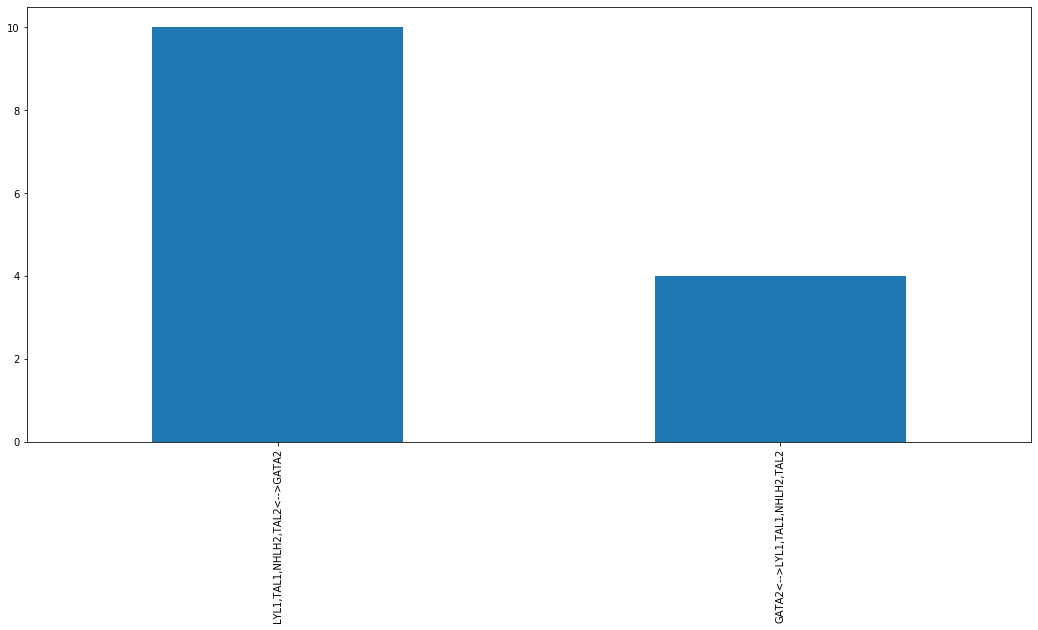

In [41]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

In [42]:
df[['TF1','TF2','adjusted_pval']]

,TF1,TF2,adjusted_pval
20,"LYL1,TAL1,NHLH2,TAL2",GATA2,1.535394e-16
62,"LYL1,TAL1,NHLH2,TAL2",GATA2,5.706297e-19
0,GATA2,"LYL1,TAL1,NHLH2,TAL2",8.184074e-21
3,GATA2,"LYL1,TAL1,NHLH2,TAL2",4.373892e-24
24,"LYL1,TAL1,NHLH2,TAL2",GATA2,3.275678e-08
34,GATA2,"LYL1,TAL1,NHLH2,TAL2",5.655081e-05
66,"LYL1,TAL1,NHLH2,TAL2",GATA2,8.680751e-11
18,"LYL1,TAL1,NHLH2,TAL2",GATA2,3.269812e-08
48,GATA2,"LYL1,TAL1,NHLH2,TAL2",3.924367e-10
32,"LYL1,TAL1,NHLH2,TAL2",GATA2,4.723865e-03
